In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
from soccer import soccer_game
from qlearner import QLearner
from friendq import FriendQ
from foeq import FoeQ
from ceq import ceQ
from training import learning_2005

### Q-Learning

In [3]:
env = soccer_game()
learner_q = QLearner(env.nS, env.nA)

hist_q = learning_2005(learner_q, env, epsilon=1, max_episode=20000)

100%|██████████| 20000/20000 [00:04<00:00, 4414.34it/s]


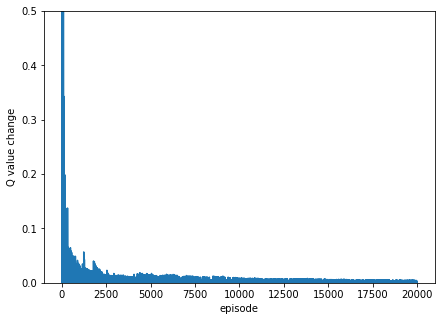

In [4]:
plot_error(hist_q, "figures/Q.png")

### Friend-Q

In [5]:
env = soccer_game()
learner_friendQ = FriendQ(env.nS, env.nA)

hist_friendQ = learning_2005(learner_friendQ, env, epsilon=1, max_episode=20000)

100%|██████████| 20000/20000 [00:04<00:00, 4328.14it/s]


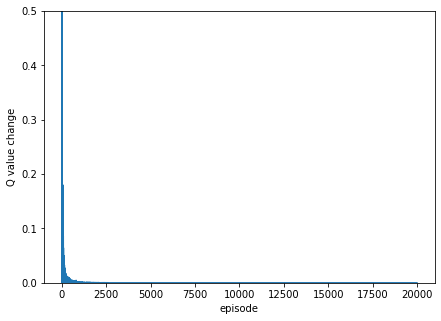

In [6]:
plot_error(hist_friendQ, "figures/friendQ.png")

In [7]:
# Q table for state 71
learner_friendQ.agents[0].Q[71].round(), learner_friendQ.agents[1].Q[71].round()

(array([[ 9., 10.,  9.,  9.,  9.],
        [ 9., 10.,  9.,  9.,  9.],
        [ 9., 10., -1.,  9.,  9.],
        [ 9., 10.,  9.,  9.,  9.],
        [ 9., 10.,  8.,  9.,  9.]]),
 array([[  9., -10.,   9.,   9.,   8.],
        [  8., -10.,   9.,   9.,   8.],
        [  8., -10.,   9.,   8.,   8.],
        [  9., -10.,   9.,   8.,   8.],
        [  8., -10.,   9.,   8.,   8.]]))

In [8]:
# Player 2's action
learner_friendQ.agents[1].select_action(71)

2

### Foe-Q

In [9]:
env = soccer_game()
learner_foeQ = FoeQ(env.nS, env.nA)

hist_foeQ = learning_2005(learner_foeQ, env, epsilon=1, max_episode=20000)

100%|██████████| 20000/20000 [00:48<00:00, 409.23it/s]


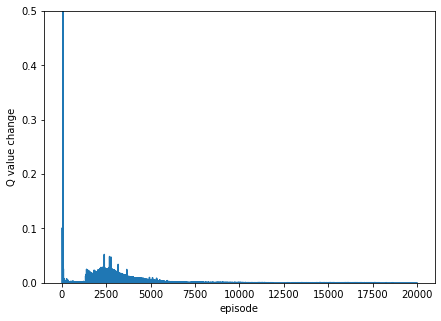

In [10]:
plot_error(hist_foeQ, "figures/foeQ.png")

In [11]:
# Q value for state(71)
learner_foeQ.agent1.Q[71].round(2), learner_foeQ.agent2.Q[71].round(2)

(array([[-1.61, -1.52, -3.52, -1.56, -3.15],
        [10.  , 10.  , 10.  , 10.  , 10.  ],
        [ 1.55,  0.04, -9.06,  1.54, -2.72],
        [-1.52, -1.52, -3.53, -1.55, -3.09],
        [-3.99, -4.78, -6.05, -3.96, -1.46]]),
 array([[  1.61, -10.  ,  -1.55,   1.52,   3.99],
        [  1.52, -10.  ,  -0.04,   1.52,   4.78],
        [  3.52, -10.  ,   9.06,   3.53,   6.05],
        [  1.56, -10.  ,  -1.54,   1.55,   3.96],
        [  3.15, -10.  ,   2.72,   3.09,   1.46]]))

In [12]:
# Policy -- probablity distribution
# stick left right up down
learner_foeQ.agent1.p[71].round(3),  learner_foeQ.agent2.p[71].round(3)

(array([0.   , 0.   , 0.   , 0.413, 0.587]),
 array([0.612, 0.   , 0.   , 0.   , 0.388]))

### Correlated Q

In [13]:
env = soccer_game()
learner_ceQ = ceQ(env.nS, env.nA)

hist_ceQ = learning_2005(learner_ceQ, env, epsilon=1, max_episode=20000)

100%|██████████| 20000/20000 [07:45<00:00, 43.00it/s]


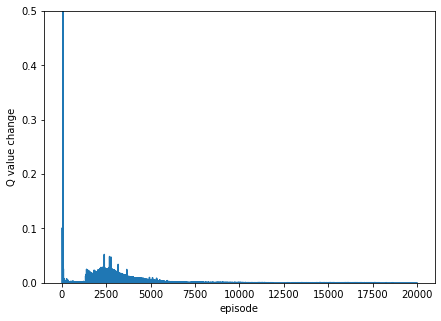

In [14]:
plot_error(hist_ceQ, "figures/ceQ.png")

In [15]:
# Q value for state(71)
learner_ceQ.agents[0].Q[71].round(2), learner_ceQ.agents[1].Q[71].round(2)

(array([[-1.61, 10.  ,  1.55, -1.52, -3.99],
        [-1.52, 10.  ,  0.04, -1.52, -4.78],
        [-3.52, 10.  , -9.06, -3.53, -6.05],
        [-1.56, 10.  ,  1.54, -1.55, -3.96],
        [-3.15, 10.  , -2.72, -3.09, -1.46]]),
 array([[  1.61, -10.  ,  -1.55,   1.52,   3.99],
        [  1.52, -10.  ,  -0.04,   1.52,   4.78],
        [  3.52, -10.  ,   9.06,   3.53,   6.05],
        [  1.56, -10.  ,  -1.54,   1.55,   3.96],
        [  3.15, -10.  ,   2.72,   3.09,   1.46]]))

In [16]:
# Policy -- probablity distribution
# stick left right up down
p = learner_ceQ.p[71].reshape(5,5)
p.sum(axis=1).round(3), p.sum(axis=0).round(3) #for each agent i's marginal probabiliby, we should sum up all axis!=i

(array([0.   , 0.   , 0.   , 0.413, 0.587]),
 array([0.612, 0.   , 0.   , 0.   , 0.388]))

### Compare Foe-Q and Correlated-Q Q values

* difference between Q values

In [17]:
np.round(learner_ceQ.agents[0].Q[71]-learner_foeQ.agent1.Q[71].T, 10)

array([[ 2.53e-08,  0.00e+00, -2.18e-08,  2.47e-08,  2.50e-09],
       [ 2.33e-08,  0.00e+00,  7.00e-10,  2.37e-08,  8.50e-09],
       [ 1.69e-08,  0.00e+00,  6.50e-09,  1.70e-08,  1.76e-08],
       [ 2.38e-08,  0.00e+00, -2.16e-08,  2.49e-08,  2.60e-09],
       [ 8.60e-09,  0.00e+00,  2.30e-09,  9.20e-09,  1.88e-08]])

* Given a same Q table, foe-Q and ce-Q should give the same solution

In [18]:
Q = np.array([[-25., -26., -29., -26., -36.],
              [100., 100., 100., 100., 100.],
              [ 10.,  -7., -91.,  10., -33.],
              [-28., -28., -28., -27., -37.],
              [-39., -38., -65., -39., -24.]])
learner_foeQ.agent1.Q[71] = Q
learner_foeQ.agent2.Q[71] = -Q.T

In [19]:
learner_foeQ.agent1.minmax(71)
print("p1", learner_foeQ.agent1.p[71].round(3), "V1", learner_foeQ.agent1.V[71])
learner_foeQ.agent2.minmax(71)
print("p1", learner_foeQ.agent2.p[71].round(3), "V1", learner_foeQ.agent2.V[71])

p1 [0.   0.   0.   0.52 0.48] V1 -31.800000000000004
p1 [0.  0.  0.  0.6 0.4] V1 31.8


In [20]:
learner_ceQ.agents[0].Q[71] = Q.T
learner_ceQ.agents[1].Q[71] = -Q.T

learner_ceQ.solve(71)
p = learner_ceQ.p[71].reshape(5,5)
print("p1", p.sum(axis=1).round(3), "V1", learner_ceQ.agents[0].V[71])
print("p2", p.sum(axis=0).round(2), "V2", learner_ceQ.agents[1].V[71])

p1 [0.   0.   0.   0.52 0.48] V1 -31.799999894036688
p2 [0.  0.  0.  0.6 0.4] V2 31.799999894036688
